# EVALUACION DE ALGORITMO

Una vez revisado el problema entendemos que aca existe un problema de prerequisitos, ya que nuestra compañera Maricielo necesita ayuda para poder realizar sus tareas en cierto orden tomando en cuenta que existen tareas que dependen de haber realiado otras. Es por ello que para la solucion de este problema se usara el algoritmo de Ordenamiento Topologico, el cual es comunmente usado para este tipo de problemas. Puesto que este hace uso de un grafo dirigido aciclico, el cual tiene nodos fuente que se usaran como nodos iniciales e ira recorriendo el grafo mediante el algoritmo Depth First Search hasta que este no encuentre mas valores y retorne el ultimo valor, esto lo hace mediante un stack o tambien puede usar recursividad como veremos a continuacion.

# IMPORTAMOS LIBRERIAS QUE USAREMOS

In [85]:
import graphviz as gv
from collections import deque

# ESCRIBIMOS EL ARCHIVO

In [103]:
%%file archivo.txt
5 4
1 4
2 3
1 3
1 5
0 0

Overwriting archivo.txt


# LEEMOS EL ARCHIVO

In [104]:
G = deque()
with open("archivo.txt") as f:
  for line in f:
    #RESTRICCION PARA LA ULTIMA LINEA
    if line == '0 0':
      break
    else:
      G.append([int(x) for x in line.split()])
      
#RECOLECTAMOS EL PRIMER VALOR EL CUAL NOS DIRA LA CANTIDAD DE CURSOS QUE EXISTEN
#Y LA CANTIDAD DE RELACIONES QUE EXISTEN
n,m = G.popleft()

#IMPRIMIMOS
print(n,m)
print(G)

5 4
deque([[1, 4], [2, 3], [1, 3], [1, 5], [0, 0]])


# CREAMOS LISTA DE ADYACENCIA

Se debe crear una lista de adjacencia puesto que los valores que nos dan estan en un formato el cual no puede entender el algoritmo toposort.

In [105]:
adjList = [[] for i in range(n+1)]
for index, edge in G:
    adjList[index].append(edge)
adjList

[[0], [4, 3, 5], [3], [], [], []]

# ALGORITMO DE ORDEN TOPOLOGICO

Este algoritmo trabajara de forma recursiva con el algoritmo DFS, el cual nos sirve para recorrer los nodos mas profundos dentro de un grafo.

In [106]:
def toposort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    visited[u] = True
    for v in G[u]:
      if not visited[v]:
        dfs(v)
    ts.append(u)

  for u in range(1, n):
    if not visited[u]:
      dfs(u)

  return ts

# CONSIDERACION

Procederemos a voltear el arreglo puesto que esta version de toposort nos retorna los valores pero imprime primero lo nodos visitados al final y los nodos visitados al principio los imprime ultimos

In [107]:
ts = toposort(adjList)

def reversed(arr, st, end):
    if st >= end:
        return arr
    arr[st], arr[end] = arr[end], arr[st]
    return reversed(arr, st+1, end-1)

ts = reversed(ts, 0, len(ts)-1)
ts

[2, 1, 5, 3, 4]

Aqui podemos observar que el ordenamiento toposort funciona perfectamente. Puesto que el valor 2 es un nodo fuente el cual no tiene flechas entrantes. Posteriormente, selecciono como segundo valor el nodo de valor 1 el cual es prerequisito de las tareas 5, 3 y 4, los cuales son los que se haran ultimo ya que primero se debera avanzar la tarea 1 para desbloquearlos.

# DIBUJAMOS CON GRAPHVIZ (No completado)

In [94]:
def drawG_al(G, directed=False, path=[]):
  graph = gv.Digraph("di-anyname") if directed else gv.Graph("anyname")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in G[u]:
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
      elif directed:
        graph.edge(str(u), str(v))
  return graph

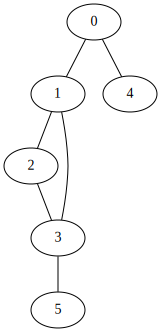

In [95]:
drawG_al(G)